### Exercise 3
Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then make a wave with duration 1 and framerate 20 kHz. Draw a sketch of what you think the spectrum will look like. Then plot the spectrum and see if you got it right.


휴먼지능정보공학과 201910803 박채희

In [12]:
import os
from thinkdsp import Chirp
from thinkdsp import normalize, unbias
import numpy as np
from thinkdsp import decorate

PI2 = 2 * np.pi

#Chirp와 evaluate를 활용하여 SawtoothChirp class 생성
class SawtoothChirp(Chirp):

    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

In [13]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

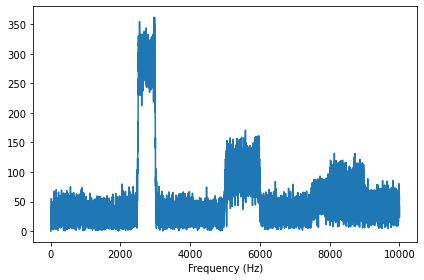

In [14]:
wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

기본으로 설정된 2500과 3000Hz 사이에서 거의 일정한 amplitude일 것으로 예상되었고, 그래프를 그려본 결과 2500에서 3000 Hz, 5000에서 6000Hz, 7500에서 9000Hz의 harmonic sweeps를 만드는 것을 확인하였다. 각각의 주파수에서 동일한 시간을 소모하는 harmonic sweeps 주파수 사이에서 그래프가 거의 평평한 모양을 보인다. 